In [ ]:
## STOCHASTIC 

In [ ]:
http://www.andrewshamlet.net/2017/07/13/python-tutorial-stochastic-oscillator/

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_stock(stock,start,end):
 return web.DataReader(stock,'google',start,end)['Close']

In [3]:
def get_high(stock,start,end):
 return web.DataReader(stock,'google',start,end)['High']

In [4]:
def get_low(stock,start,end):
 return web.DataReader(stock,'google',start,end)['Low']

In [5]:
def STOK(close, low, high, n): 
 STOK = ((close - pd.Series.rolling(low, n).min()) / (pd.Series.rolling(high, n).max() - pd.Series.rolling(low, n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.Series.rolling(low, n).min()) / (pd.Series.rolling(high, n).max() - pd.Series.rolling(low, n).min())) * 100
 STOD = pd.Series.rolling(STOK, 3).mean()
 return STOD


In [6]:
#STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100

In [7]:
dftst = pd.DataFrame({'B': [10,9,8,7,6,5,4,3,2,1,0, 1, 2, 3, 4,5,6,7.0,8.0,9,8,7,6,5,4,3,2,1,0,1,2,3,4,5,6,7,8]})
dftst['rollMax']=pd.Series.rolling(dftst['B'],3).max()
dftst['rollMin']=pd.Series.rolling(dftst['B'],3).min()
dftst['fall']=pd.Series.rolling(dftst['B'],3).max()-dftst['B']>=2
##dfrev= dftst[::-1]
##dftst['revB']= dfrev['B'] 
##dftst['revmax']= pd.Series.rolling(dfrev['B'],3).max()
dftst['rise']= dftst['B']-pd.Series.rolling(dftst['B'],3).min()>=2
dftst

,B,rollMax,rollMin,fall,rise
0,10.0,NaN,NaN,False,False
1,9.0,NaN,NaN,False,False
2,8.0,10.0,8.0,True,False
3,7.0,9.0,7.0,True,False
4,6.0,8.0,6.0,True,False
5,5.0,7.0,5.0,True,False
6,4.0,6.0,4.0,True,False
7,3.0,5.0,3.0,True,False
8,2.0,4.0,2.0,True,False
9,1.0,3.0,1.0,True,False


In [8]:
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['High'] = get_high('FB', '1/1/2016', '12/31/2016')
df['Low'] = get_low('FB', '1/1/2016', '12/31/2016')

In [14]:
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)
df['Avg50'] =pd.Series.rolling(df['Close'],50).mean()
df['Avg20'] =pd.Series.rolling(df['Close'],20).mean()
df['Rise'] = df['Close'] - pd.Series.rolling(df['Close'],5).min() > 5 #df['Close']*0.05
#df.tail()
df.shape

(251, 8)

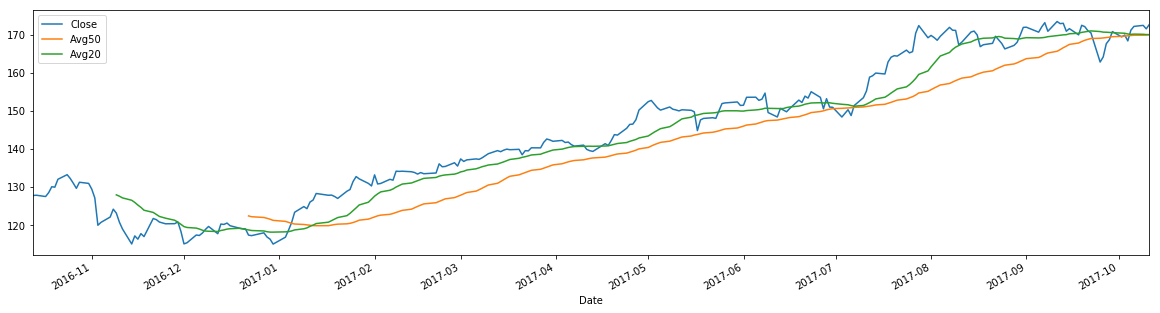

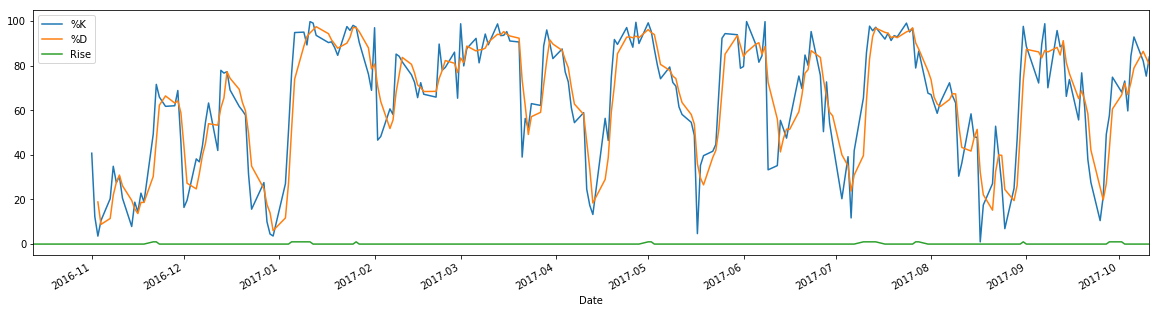

In [15]:
df.plot(y=['Close','Avg50','Avg20'], figsize = (20, 5))
df.plot(y=['%K', '%D','Rise'], figsize = (20, 5))